<a href="https://colab.research.google.com/github/doronin99/clients/blob/main/clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/doronin99/clients/main/clients.csv")

## Клиенты авиакомпании
Датасет содержит информацию о клиентах некоторой авиакомпании.

_Целевая переменная_ (таргет) – `satisfaction` (удовлетворенность клиента полетом), бинарная (_satisfied_ или _neutral or dissatisfied_)

### Признаки
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)

Признаки, перечисленные ниже, являются числовыми. По смыслу они категориальные: клиент ставил оценку от 1-го до 5-ти включительно. Есть выбросы!
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

## Разведочный анализ данных и preprocessing

In [ ]:
df.head(5)

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied


In [ ]:
df.shape

(129880, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

Удалим столбец `id`

In [ ]:
df.drop(['id'], axis=1, inplace=True)

Удалим строки с пропущенными значениями во всех признаках, кроме `Age` и `Gender`, т.к. кол-во пропущенных значений в этих столбцах значительно больше

In [ ]:
df.dropna(subset=filter(lambda x: x not in ['Gender', 'Age', 'satisfaction'], df.columns), inplace=True)

In [ ]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,127916,128240,128240,128240,128240
unique,2,2,2,3,3
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,64906,104747,88566,61367,58125


In [ ]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58125
satisfied                  44472
-                          25643
Name: satisfaction, dtype: int64

Удалим строки с пропущенными значениями таргета и заменим значение *neutral or dissatisfied* на 1, а *satisfied* - на 0

In [ ]:
df = df[df['satisfaction'] != '-']

In [ ]:
df['satisfaction'] = df['satisfaction'].apply(lambda x: 1 if x == 'neutral or dissatisfied' else 0)

Закодируем значение признаков `Gender`, `Customer Type`, `Type of Travel` нулем и единицей

In [ ]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
df['Customer Type'] = df['Customer Type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)
df['Type of Travel'] = df['Type of Travel'].apply(lambda x: 1 if x == 'Business travel' else 0)

Посмотрим на числовые признаки

In [ ]:
numeric_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [ ]:
df[numeric_cols].describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,102339.000000,102597.000000,102597.000000,102597.000000
mean,40.047128,1327.268790,15.729388,16.781280
std,20.332450,4677.160433,73.868426,109.506957
min,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,612.000000,379620.000000,11011.000000,14006.000000


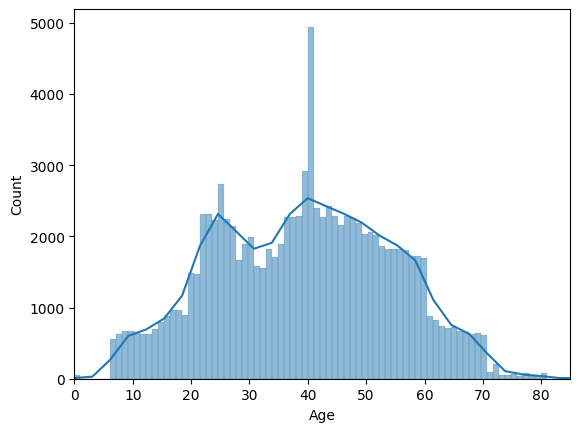

In [ ]:
sns.histplot(df['Age'], kde=True).set_xlim(0,85)
plt.show()

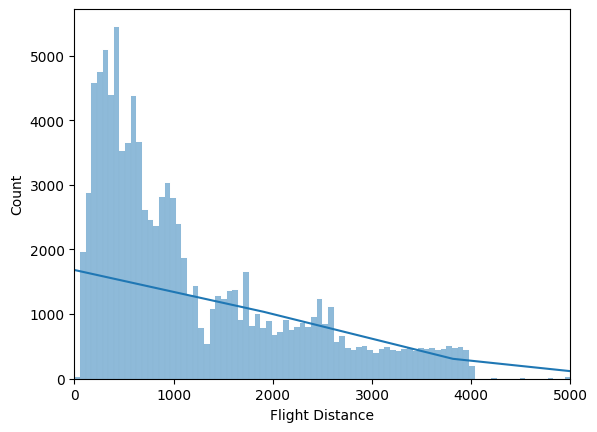

In [ ]:
sns.histplot(df['Flight Distance'], kde=True).set_xlim(0,5000)
plt.show()

Заменим пропущенные значения в столбце `Age` средним значением

In [ ]:
mean = df['Age'].mean()

df['Age'].fillna(mean, inplace=True)

Удалим строки с выбросами для признаков `Age` и `Flight Distance`, т.е. со значениями >80 и >4000 соответственно

In [ ]:
df = df[df['Age'] < 80]
df = df[df['Flight Distance'] < 4000]

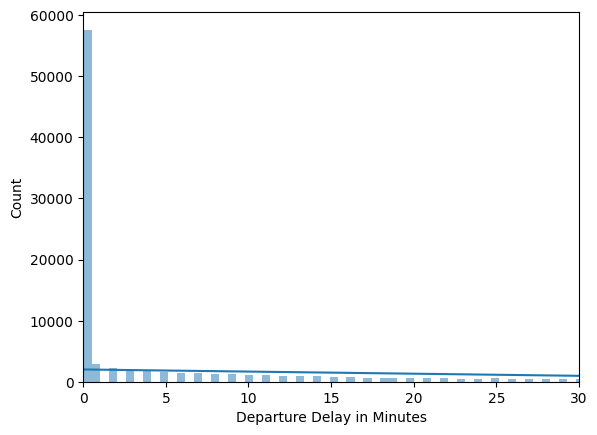

In [ ]:
sns.histplot(df['Departure Delay in Minutes'], kde=True).set_xlim(0,30)
plt.show()

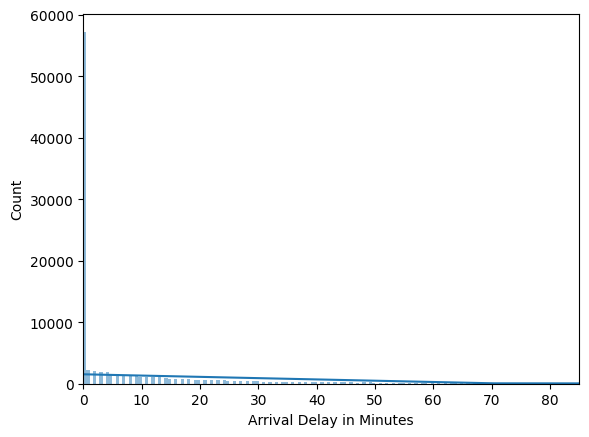

In [ ]:
sns.histplot(df['Arrival Delay in Minutes'], kde=True).set_xlim(0,85)
plt.show()

Удалим столбцы `Departure Delay in Minutes` и `Arrival Delay in Minutes`, т.к. значение в этих столбцах преимущественное нулевые

In [ ]:
df.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1, inplace=True)

Посмотрим на поведение признаков, которые представляют собой оценку от 1 до 5

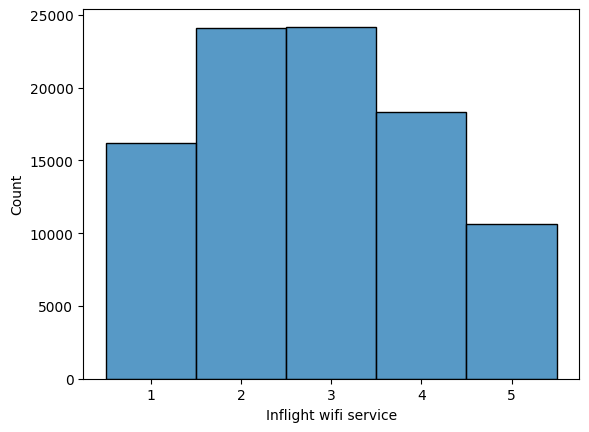

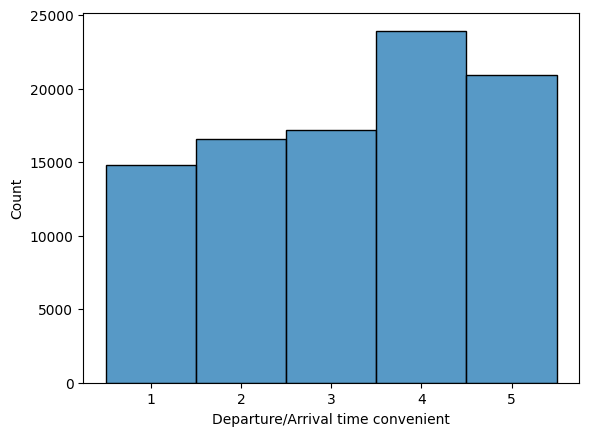

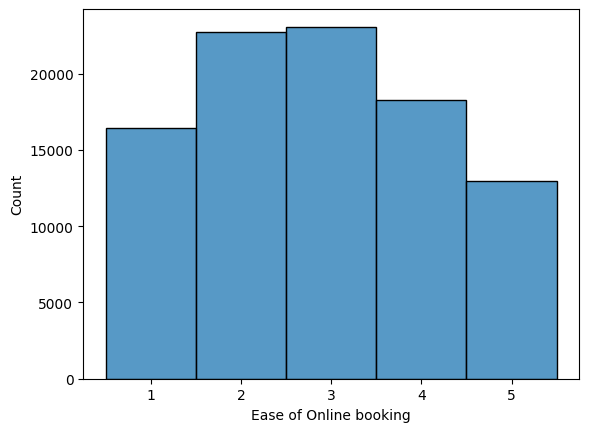

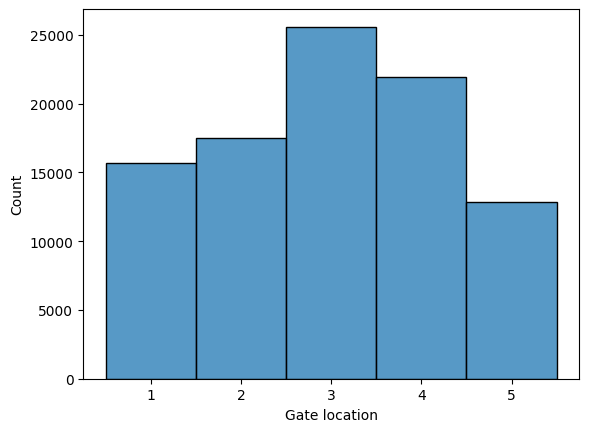

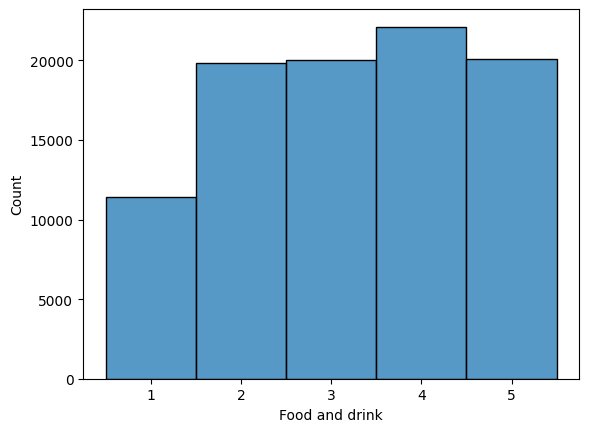

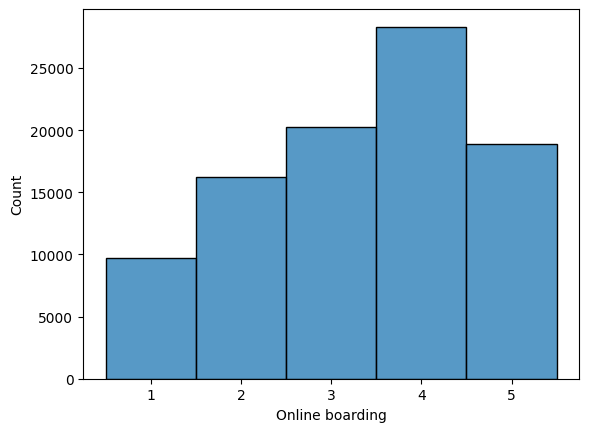

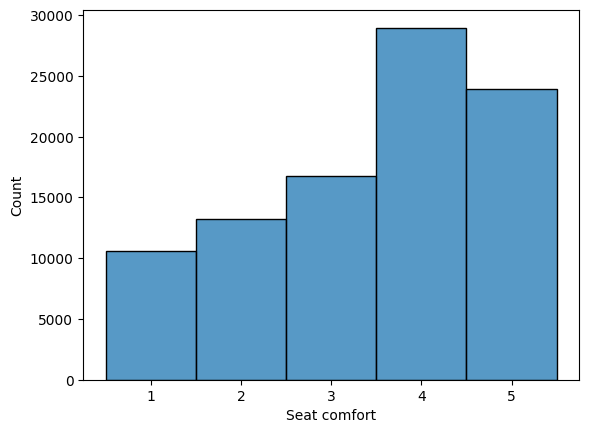

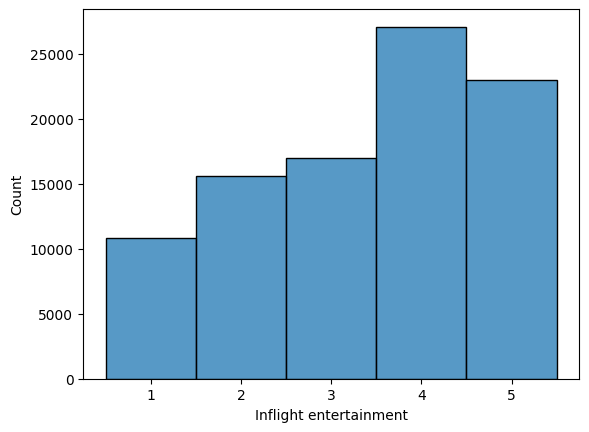

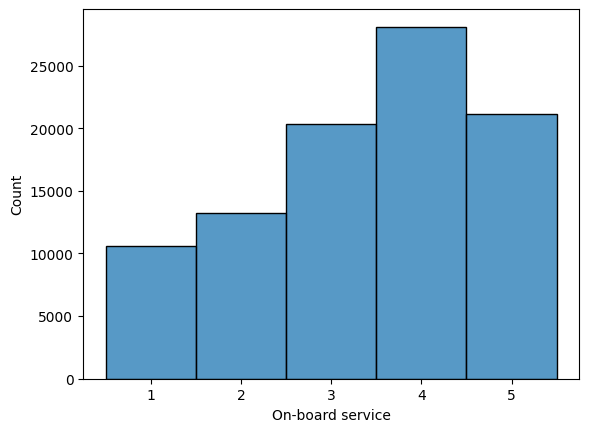

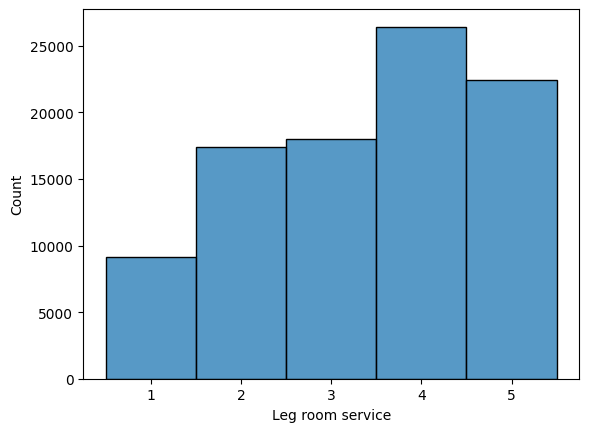

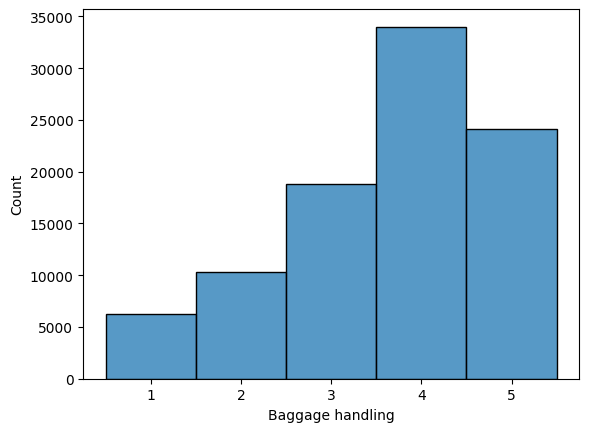

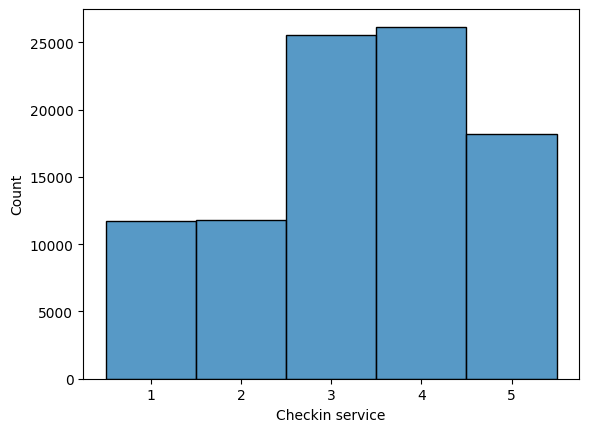

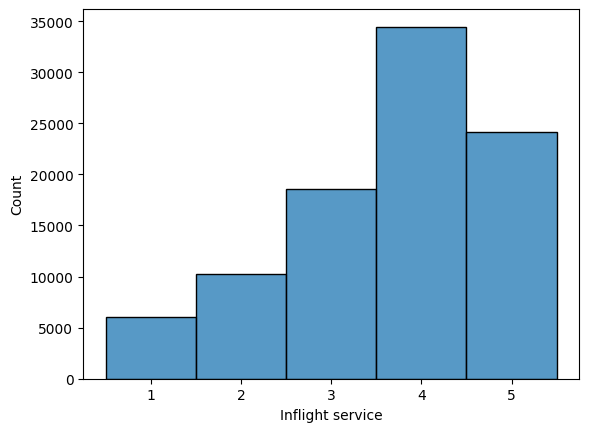

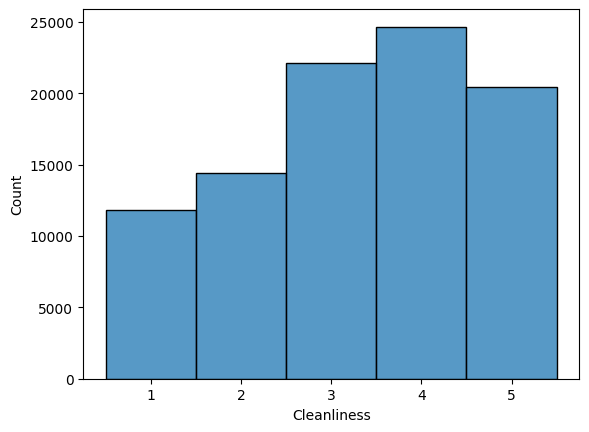

In [ ]:
selected_cols = ['Inflight wifi service',
'Departure/Arrival time convenient',
'Ease of Online booking',
'Gate location',
'Food and drink',
'Online boarding',
'Seat comfort',
'Inflight entertainment',
'On-board service',
'Leg room service',
'Baggage handling',
'Checkin service',
'Inflight service',
'Cleanliness']


for col in selected_cols:
  df = df[df[col] <= 5]
  df = df[df[col] >= 1]
  sns.histplot(df[col], binwidth=1, binrange=(.5, 5.5))
  plt.show()

Среди данных признаков нет такого, в котором распределение оценок имело бы существенное смещение. Оставляем все признаки

In [ ]:
df[list(filter(lambda x: x in selected_cols, df.columns))] = df[list(filter(lambda x: x in selected_cols, df.columns))].astype('category')

## Построение элементарной модели

In [ ]:
X = df.drop(['satisfaction'], axis=1)

y = df['satisfaction'] # целевая переменная (satisfaction)

In [ ]:
X.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0,48.0,0,1,Business,821.0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0
1,1,35.0,1,1,Business,821.0,2.0,2.0,2.0,2.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0
2,0,41.0,1,1,Business,853.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0
3,0,50.0,1,1,Business,1905.0,2.0,2.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0
4,1,49.0,1,1,Business,3470.0,3.0,3.0,3.0,3.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0


Дальше было бы целесообразно сделать энкодинг признака `Class`, скалировать некоторые другие признаки и др. Но на данном этапе, закодируем только признак `Class` простейшим способом с некоторыми оговорками

In [ ]:
X['Class'].value_counts()

Business    45296
Eco         41312
Eco Plus     6840
Name: Class, dtype: int64

In [ ]:
X['Class'] = X['Class'].apply(lambda x: 1 if x in ['Eco', 'Eco Plus'] else 0)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((70086, 20), (23362, 20))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=5000)

lr.fit(X_train, y_train)

pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.8978683331906515

## Улучшение модели логистической регрессии

In [ ]:
X = df.drop(['satisfaction'], axis=1)

y = df['satisfaction'] # целевая переменная (satisfaction)

In [ ]:
!pip install category_encoders -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.0 MB/s eta 0:00:00


Закодируем призна `Class` c помощью OHE

In [ ]:
from category_encoders.one_hot import OneHotEncoder

X = pd.concat([X.drop(['Class'], axis=1),
               OneHotEncoder().fit_transform(X['Class']).drop(['Class_1'], axis=1)],
              axis=1)
X.head()

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Class_2,Class_3
0,0,48.0,0,1,821.0,3.0,3.0,3.0,3.0,5.0,...,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,0,0
1,1,35.0,1,1,821.0,2.0,2.0,2.0,2.0,3.0,...,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,0,0
2,0,41.0,1,1,853.0,4.0,4.0,4.0,4.0,5.0,...,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,0,0
3,0,50.0,1,1,1905.0,2.0,2.0,2.0,2.0,4.0,...,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,0,0
4,1,49.0,1,1,3470.0,3.0,3.0,3.0,3.0,4.0,...,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((70086, 21), (23362, 21))

Масштабируем признаки с помощью MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
ss.fit(X_train) # вычислить min, max по каждому столбцу

X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

X_train.head()

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Class_2,Class_3
0,1.0,0.240506,1.0,0.0,0.109527,0.00,0.00,0.50,0.75,0.25,...,0.25,0.25,0.25,0.00,0.50,0.0,0.50,0.25,0.0,0.0
1,0.0,0.569620,1.0,1.0,0.436109,0.00,0.75,0.75,0.75,1.00,...,0.50,0.00,0.00,0.00,0.00,0.5,0.00,0.00,0.0,0.0
2,0.0,0.506926,0.0,1.0,0.601400,0.25,0.25,0.25,0.00,0.25,...,0.25,0.25,0.25,0.25,0.00,1.0,0.00,0.25,0.0,1.0
3,0.0,0.253165,1.0,0.0,0.293323,0.25,1.00,0.25,0.00,0.25,...,0.25,0.25,1.00,1.00,0.75,0.5,1.00,0.25,1.0,0.0
4,0.0,0.696203,1.0,1.0,0.297074,0.00,0.75,0.25,0.75,0.00,...,0.00,0.75,1.00,0.25,0.50,0.0,0.25,0.00,1.0,0.0


Повторно построим модель логистической регрессии

In [ ]:
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

0.8985532060611249

Есть небольшое улучшение метрики качества

Веса модели

In [ ]:
importances = pd.DataFrame({'weights': lr.coef_[0], 'features': X_train.columns}).sort_values(by='weights')
importances

,weights,features
10,-3.695139,Online boarding
3,-3.305081,Type of Travel
5,-3.072090,Inflight wifi service
2,-2.752754,Customer Type
7,-1.490441,Ease of Online booking
13,-1.439187,On-board service
16,-1.416804,Checkin service
14,-1.259360,Leg room service
18,-0.949989,Cleanliness
15,-0.677335,Baggage handling


## Построение других моделей

Построим дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

pred = dtc.predict(X_test)

accuracy_score(y_test, pred)

0.9410581285848815

Видим, что дерево решений дает более высокий результат метрики *accuracy_score*

Теперь попробуем *RandomForestClassifier*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)

accuracy_score(y_test, pred)

0.9605342008389692

Видим, что *RandomForestClassifier* дает наилучший результат. Остановимся на этой модели

In [ ]:
import pickle

with open('model_weights.mw', 'wb') as file:
    pickle.dump(dtc, file)